# Laboratorio 4: Redes Neuronales

## Objetivos del laboratorio:

*   Comprender el proceso general de entrenamiento de redes neuronales artificiales.
*   Identificar las diferencias entre modelos lineales, generativos cuadráticos y no-lineales.
*   Identificar la influencia de la arquitectura en el desempeño de las redes neuronales.
*   Identificar la importancia de la validación en los procesos de entrenamiento iterativo de las máquinas.



In [1]:
import numpy as np
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
#Bloque para definir los datasets:
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

print('Cada dataset contiene las muestras X y sus etiquetas:')
for X,y in datasets:
  print('X:',X.shape,'y:',y.shape)

Cada dataset contiene las muestras X y sus etiquetas:
X: (100, 2) y: (100,)
X: (100, 2) y: (100,)
X: (100, 2) y: (100,)


El siguiente bloque ilustra la estrategia de validación para selección de modelos **Train_test_split**, en la cual la base de datos se parte en dos porciones: Una para entrenar y otra para evaluar.

Estrategia train_test_split
Datos de entrenamiento. Muestras: (66, 2) Etiquetas: (66,)
Datos de prueba. Muestras: (34, 2) Etiquetas: (34,)
Datos totales. Muestras: (100, 2) Etiquetas: (100,)
[[ 0.03159499  0.98698776]
 [ 2.11509784 -0.04624397]
 [ 0.88248972 -0.07575606]
 [-0.0551441  -0.03733246]
 [ 0.82954503 -0.53932149]
 [ 2.11285708  0.66208353]
 [ 0.5696927   0.33744136]
 [ 0.95217454 -0.75307471]
 [-0.02922115  0.39287336]
 [ 1.71579557  0.36069454]
 [-0.27883014  0.61420539]
 [ 2.00344509 -0.3091496 ]
 [ 1.50009616 -0.74636376]
 [ 1.22540835  1.19793017]
 [ 0.46730819  0.54703192]
 [-0.36653222  1.11971633]
 [ 0.30124459  1.23315697]
 [ 0.30430746  0.82373935]
 [-0.23712492  0.77876034]
 [ 1.16339832  0.55290238]
 [-0.59702417  0.6572361 ]
 [ 0.46356735 -0.1951543 ]
 [ 0.68451111  0.75287685]
 [ 0.70515699 -0.45892444]
 [-0.65805008 -0.12944211]
 [-0.74662946 -0.3829632 ]
 [ 0.60585226  0.31252842]
 [ 2.18137168 -0.02291747]
 [ 1.91980633  0.17247329]
 [ 1.4834364  -0.10517023]

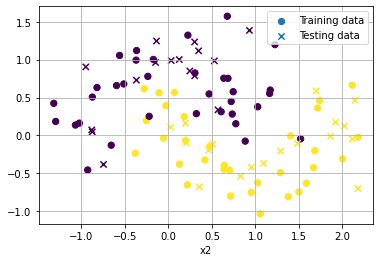

In [3]:
from sklearn.model_selection import train_test_split, StratifiedKFold
#Seleccionamos un dataset:
X, y = datasets[0]
#Ejemplo train_test_split:
#Definimos un porcentaje de datos para test:
test_size = 1/3;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
print('Estrategia train_test_split')
print('Datos de entrenamiento. Muestras:',X_train.shape,'Etiquetas:',y_train.shape)
print('Datos de prueba. Muestras:',X_test.shape,'Etiquetas:',y_test.shape)
print('Datos totales. Muestras:',X.shape,'Etiquetas:',y.shape)

print(X)
print(y)

plt.scatter(X_train[:,0].reshape(-1,1),X_train[:,1].reshape(-1,1),s=40,c=y_train,label = 'Training data')
plt.scatter(X_test[:,0].reshape(-1,1),X_test[:,1].reshape(-1,1),s=40,marker = 'x',c=y_test,label = 'Testing data')
plt.xlabel('x1')
plt.xlabel('x2')
plt.legend()
plt.grid(True)
plt.show()

# Actividad 1:

Use el manual de ```MLPClassifier``` dentro de ```sklearn.neural_network``` para responder:

1. ¿Cómo se define la arquitectura del MLP?

2. ¿Qué función cumplen los parámetros del creador del MLP?

3. ¿Para qué sirve el método ```score```?

4. ¿Para qué sirve el método ```predict_proba```?

# Respuestas Actividad 1
## ¿Cómo se define la arquitectura del MLP?
Multi-layer Perceptron (MLP) es un algoritmo de aprendizaje supervisado basandose en sistema multi-capa de una capa con una cantidad de dimensioens a otra capa con OTRA cantidad de dimensiones meidante el uso de regresiones logisticas. Cada neurona de este sistema son "features" o caracteristicas de entrada al problema

## ¿Qué función cumplen los parámetros del creador del MLP?
* hidden_layer_sizes: Es el tamaño de las capas ocultas, en si el parametro (100,) dice el tamaño que tiene una sola capa oculta, ahora pueden haber n capas ocultas en caso de que hayan mas más serian dandole valores a cada parte de la tupla (100, 50, 23, 6) seria los tamaños para 4 capas ocultas de manera correspondiente
* activation: Es la función de activación a utilizar para poder que la neurona se active para el proceso de separación de los datos que son las siguientes
    * Identidad: implementa una función linear bootleneck returns f(x) = x, donde saca el valor tal cual que le entró a la neurona (muy usado en regresión)
    * Logistica: hace una función logistica por medio de un sigmoide returns f(x) = 1 / (1 + exp(-x)).
    * tanh: es la función tangente hiperbolica returns f(x) = tanh(x).
    * relu: retona una función lineal retificada siendo returns f(x) = max(0, x)
* solver: El solucionador para el manejo de los pesos en la red
    * LBFGS: es un optimizador de la familia de los métodos quasi-Newton
    * SGD: Hace referencia al gradiente desendiente etocastico
    * ADAM: Hace referencia al gradiente desendiente optimizado estocastico

* alpha: Parametro para regular los resultados y asi evitar sobre-entrenamiento
* batch_size: Es el numero de muestras por el que dividirá tanto las partes del dataset, el valor default de 200, donde lo que hace es que si la base de datos tiene 1000 formará 5 batchs
* learning_rate: Es la taza de aprendizaje que se queira utilizar al modelo.
    * Constante: un aprendizaje que no cambia
    * invscaling: Es un cambio que decrece a razón de cada tiem step t, con el exponente de power_t. La aplicación es effective_learning_rate = learning_rate_init / pow(t, power_t)
    * adaptative: mantiene el entrenamiento es constante por largo tiempo del entremamiento y decrece luego lentamente. Por dos "epocas" consecutivas falla decrece el entrenamiento hasta que supere una tolerancia o falla al superar la validación del puntaje

* learning_rate_init
* power_t
* max_iter
* shuffle
* random_state: Los valores que se generan de forma aleatoria, ya que los valores no son tna aleatorios tienen una semilla, la cual se puede indicar para que si se usan dos maquinas diferentes tengan menores diferencias al aplicar en el mismo problema 
* tol
* verbose
* warm_start: Hace que el entrenamiento del modelo cuando vuelva a inicializarse empeice no desde 0 si no del ultimo valor que se tenia de un entreamiento anterior
* momentum: Es el valor de "inercia" del comportamiento de fluctuación de los datos
* nesterovs_momentum
* early_stopping: Si esta activo el usa el 10% de los datos de entranamiento de forma aleatoria para realizar sus validaciones
* validation_fraction
* beta_1
* beta_2
* epsilon
* n_iter_no_change
* max_fun

## ¿Para qué sirve el método ```score```?
El método score entrega la media de la precisión dado por unos datos de muestra con sus respectivas etiquetas. En una clasificación multicapa que es un subset de precisiones con metricas de cada etiqueta mostrando que tan bien predicho ha sido.

## ¿Para qué sirve el método ```predict_proba```?
Estima la probabilidad de los datos. Calcula la matriz de probabildiades que es la probabildiad que tiene cada muestra de ser de cada clase

# Actividad 2:#

Entrene un MLP para clasificar las muestras en ```datasets[0]``` con 200 nodos en una única capa oculta  usando la estrategia train_test_split. Defina la cantidad de iteraciones máximas como ```max_iter=1``` y ```warm_start=True``` para actualizar la red iteración a iteración en el ciclo indicado. 

Almacene en la lista ```acc_train``` el acierto de clasificación para los datos de entrenamiento en cada iteración y en  ```acc_test``` el acierto de clasificación para los datos de prueba. 

¿Qué puede concluir de la gráfica? 

¿Qué pasa si ejecuta de varias veces el bloque? Justifique su respuesta.


c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


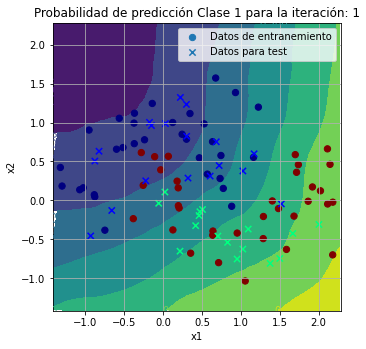

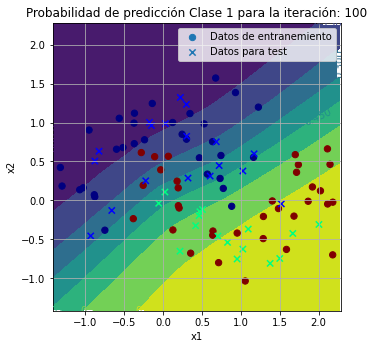

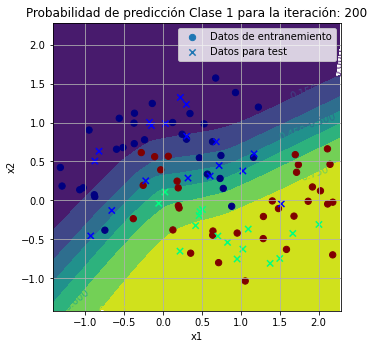

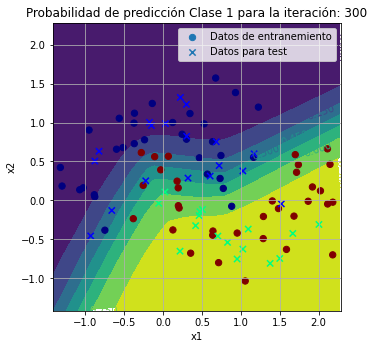

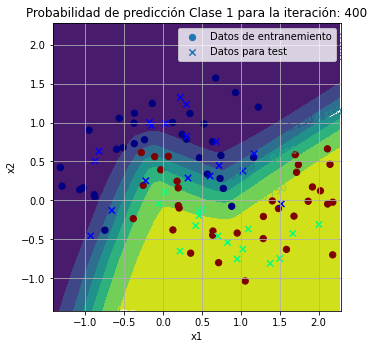

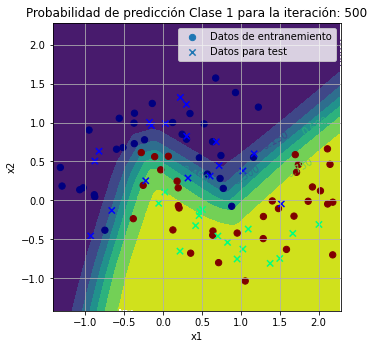

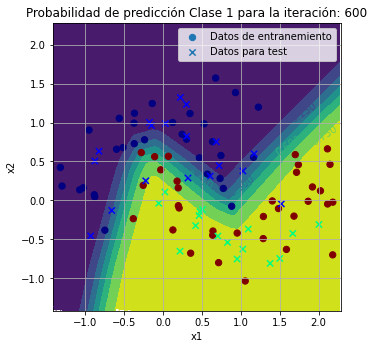

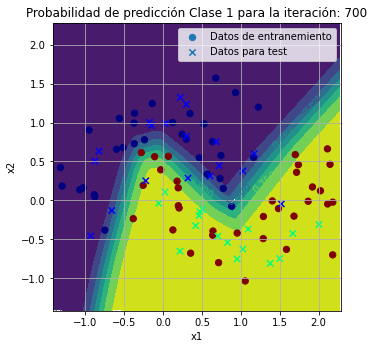

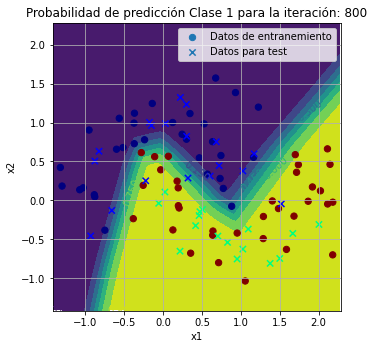

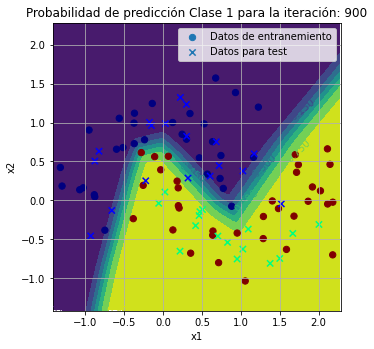

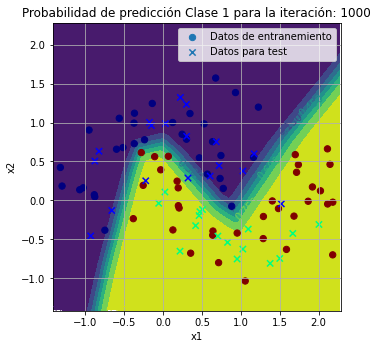

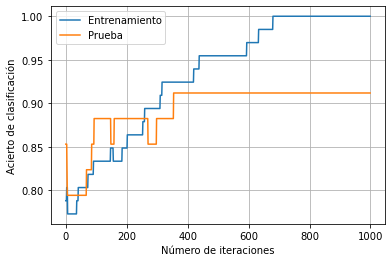

In [4]:
X,y = datasets[0]

#Espacio para aplicar la estrategia de validación y crear el objeto de clasificación
test_size = 1/3;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
#
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(200,),max_iter=1,warm_start=True)
acc_train = []
acc_test = []



for i in range(1000):
  #Espacio para entrenar y calcular los aciertos. Nota: reemplace el cero en acc_train y acc_test por los aciertos respectivos
  mlpc.fit(X_train, y_train)
  
    
  #
  acc_train.append(mlpc.score(X_train, y_train))
  acc_test.append(mlpc.score(X_test, y_test))
  # Sección para graficar
  if (i+1)%100 == 0 or i==0:
    min_x1 = np.min(X) - 0.1
    max_x1 = np.max(X) + 0.1
    x1 = np.arange(min_x1,max_x1,0.01)
    x2 = np.arange(min_x1,max_x1,0.01)
    xx1,xx2 = np.meshgrid(x1,x2)
    X_plot = np.concatenate((xx1.reshape(xx1.size,1),xx2.reshape(xx2.size,1)),axis=1)
    # por favor, cambiar en la linea acontinuación las XXXX por el nombre que le hayan puesto a la clase MLPClassifier
    Prob = mlpc.predict_proba(X_plot)
    fig = plt.figure()
    axes = fig.add_axes([1, 1, 1, 1])
    cnt = axes.contourf(x1,x2,Prob[:,1].reshape(xx1.shape))
    axes.clabel(cnt, inline=1, fontsize=10)
    axes.scatter(X_train[:,0],X_train[:,1],c=y_train,s = 40,label='Datos de entranemiento',cmap=plt.cm.jet)
    axes.scatter(X_test[:,0],X_test[:,1],c=y_test+200,s = 40,marker='x',cmap=plt.cm.winter,label='Datos para test')
    plt.xlim([min_x1,max_x1])
    plt.ylim([min_x1,max_x1])
    axes.set_aspect('equal', 'box')
    plt.title('Probabilidad de predicción Clase 1 para la iteración: %i' % (i+1))
    plt.legend()
    plt.grid(True)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.show()

plt.figure()
plt.plot(acc_train,label='Entrenamiento')
plt.plot(acc_test,label='Prueba')
plt.legend()
plt.xlabel('Número de iteraciones')
plt.ylabel('Acierto de clasificación')
plt.grid(True)
plt.show()

# Respuesta actividad 2

## ¿Qué puede concluir de la gráfica? 
En las graficas se concluye que el score va mejorando a medida que se va aumentando las iteraciones, los resultados cambian obviamente cada que se corre debido a que la toma de datos de la neurona no tiene semilla por ende es muy aleatorio

## ¿Qué pasa si ejecuta de varias veces el bloque? Justifique su respuesta.
Al ejecutarlo varias veces la respuesta varia debido a que no tiene semilla definada para su conexión de datos aleatorio este varia en cada vez por ende los resultados varian mucho

# Actividad 3:#
Con el MLP entrenado grafique la frontera de clasificación con los datos ```X_plot```. 

De la misma forma entrene un clasificador LDA y un QDA para resolver el mismo problema y grafique sus respectivas fronteras.

¿Qué tipo de fronteras se construye?
¿Cuál máquina resuelve el problema de mejor manera? ¿Por qué?

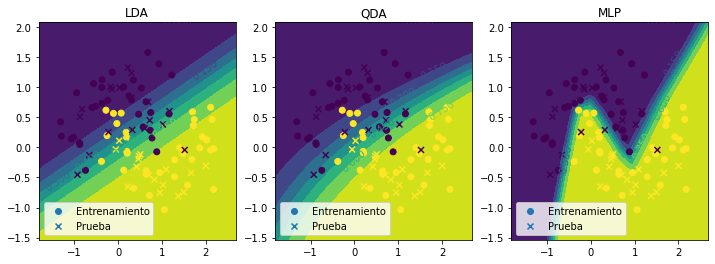

In [5]:
#Valores mínimos y máximos de las variables
xmin = np.min(X,axis=0)
xmax = np.max(X,axis=0)
#Malla de valores
x1, x2 = np.meshgrid(np.linspace(xmin[0]-0.5, xmax[0]+0.5, 100),
                     np.linspace(xmin[1]-0.5, xmax[1]+0.5, 100))
#Datos para evaluar los clasificadores y graficar la frontera:
X_plot = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))

#Espacio para evaluar el MLP en los datos X_plot:
#mlpc = MLPClassifier(hidden_layer_sizes=(200,),max_iter=1,warm_start=True)

pred_mlpc=mlpc.predict_proba(X_plot)


#Espacio para crear, entrenar con X,y, y evaluar con X_plot los clasificadores LDA y QDA:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

pred_lda=lda.predict_proba(X_plot)

pred_qda=qda.predict_proba(X_plot)
#

plt.figure(figsize=(12,4))
#Grafique la frontera con LDA
plt.subplot(1,3,1)
plt.title('LDA')


cnt=plt.contourf(x1,x2,pred_lda[:,1].reshape(x1.shape))
plt.clabel(cnt, inline=1, fontsize=10)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label='Entrenamiento')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x',label='Prueba')
# pred_lda
plt.legend()

#Grafique la frontera con LDA
plt.subplot(1,3,2)
plt.title('QDA')

cnt=plt.contourf(x1,x2,pred_qda[:,1].reshape(x1.shape))
plt.clabel(cnt, inline=1, fontsize=10)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label='Entrenamiento')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x',label='Prueba')
plt.legend()

#Grafique la frontera con MLP
plt.subplot(1,3,3)
plt.title('MLP')

# [:,1] Probabildiad de que pertenezca a la clase 1
cnt=plt.contourf(x1,x2,pred_mlpc[:,1].reshape(x1.shape))
plt.clabel(cnt, inline=1, fontsize=10)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label='Entrenamiento')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x',label='Prueba')
plt.legend()

plt.show()

# Actividad 4:#
Entre un MLP con diferentes arquitecturas para clasificar las muestras en ```datasets[1]```. Defina sus arquitectura como una lista dentro de la variable ```arquitecturas```. El entrenamiento se repetirá una cantidad ```R``` de veces. Guarde el acierto en entrenamiento y prueba en las lista ```acc_train``` y ```acc_test```, respectivamente.

¿Qué puede concluir de la gráfica?

¿Qué arquitectura cree que resuelve mejor el problema? ¿Por qué?

c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_

c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_

c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_

c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\program files\python38\lib\site-packages\sklearn\neural_network\_

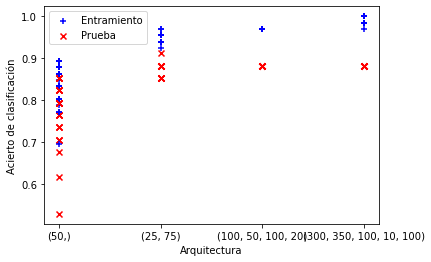

In [6]:
#Cargamos la base de datos
X,y = datasets[1]
#Definimos un número de repeticiones para realizar el entrenamiento
R = 30

#Espacio para aplicar la estrategia de validación y crear el objeto de clasificación
test_size = 1/3;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

from sklearn.neural_network import MLPClassifier


#

#Lista para crear las arquitecturas. Ej: [(10),(20,10)]
arquitecturas = [(50,),(25,75),(100,50,100,20), (300, 350, 100, 10, 100)] 

for r in range(R):
  acc_train = []
  acc_test = []
  for arq in arquitecturas:
    #Espacio para crear el objeto, entrenar y calcular los aciertos.
    mlpc = MLPClassifier(hidden_layer_sizes=arq)
    
    mlpc.fit(X_train, y_train)
    
    #
    acc_train.append(mlpc.score(X_train, y_train))
    acc_test.append(mlpc.score(X_test, y_test))
  
  plt.scatter(range(len(arquitecturas)),acc_train,c='blue',marker='+')
  plt.scatter(range(len(arquitecturas)),acc_test,c='red',marker='x')

plt.legend(('Entramiento','Prueba'))
plt.xticks(range(len(arquitecturas)),labels=arquitecturas)
plt.xlabel('Arquitectura')
plt.ylabel('Acierto de clasificación')
plt.show()

# Actividad 5:#
Con la arquitectura que usted considera que mejor resuelve el problema, repita la actividad 2 con ```dataset[1]```.

¿Qué tipo de fronteras se construye?

¿Cuál clasificador resuelve el problema de mejor manera? ¿Por qué?

c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


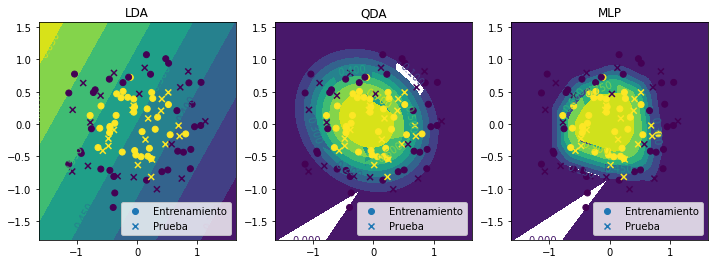

In [7]:
#Valores mínimos y máximos de las variables
xmin = np.min(X,axis=0)
xmax = np.max(X,axis=0)
#Malla de valores
x1, x2 = np.meshgrid(np.linspace(xmin[0]-0.5, xmax[0]+0.5, 100),
                     np.linspace(xmin[1]-0.5, xmax[1]+0.5, 100))
#Datos para evaluar los clasificadores y graficar la frontera:
X_plot = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))

#Espacio para crear, entrenar, evaluar los clasificadores y graficar fronteras:
test_size = 1/3;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

mlpc = MLPClassifier(hidden_layer_sizes=(25,75))
    
mlpc.fit(X_train, y_train)

#Espacio para evaluar el MLP en los datos X_plot:
pred_mlpc=mlpc.predict_proba(X_plot)


#Espacio para crear, entrenar con X,y, y evaluar con X_plot los clasificadores LDA y QDA:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

pred_lda=lda.predict_proba(X_plot)

pred_qda=qda.predict_proba(X_plot)

#

plt.figure(figsize=(12,4))
#Grafique la frontera con LDA
plt.subplot(1,3,1)
plt.title('LDA')

cnt=plt.contourf(x1,x2,pred_lda[:,1].reshape(x1.shape))
plt.clabel(cnt, inline=1, fontsize=10)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label='Entrenamiento')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x',label='Prueba')
plt.legend()

#Grafique la frontera con LDA
plt.subplot(1,3,2)
plt.title('QDA')

cnt=plt.contourf(x1,x2,pred_qda[:,1].reshape(x1.shape))
plt.clabel(cnt, inline=1, fontsize=10)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label='Entrenamiento')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x',label='Prueba')
plt.legend()

#Grafique la frontera con MLP
plt.subplot(1,3,3)
plt.title('MLP')

cnt=plt.contourf(x1,x2,pred_mlpc[:,1].reshape(x1.shape))
plt.clabel(cnt, inline=1, fontsize=10)

plt.scatter(X_train[:,0],X_train[:,1],c=y_train,label='Entrenamiento')
plt.scatter(X_test[:,0],X_test[:,1],c=y_test,marker='x',label='Prueba')
plt.legend()

plt.show()

# Actividad 6:#

Entrene dos MLP con 100, 50 y 20 neuronas en la primera, segunda, y tercer capa ocultas para clasificar las muestras en el ```datasets[2]```. Fije la cantidad máxima de iteraciones en un número mayor a 1000. Utilice su fecha de cumpleaños como semilla para la generación de números aleatorios (```random_state```).

**Sólo para el segundo MLP**, fije el parámetro ```early_stopping=True```.

Grafique las fronteras de los dos MLP.

¿Qué diferencias nota en las fronteras? 

¿A qué se deben las diferencias?

¿Cuál de los dos MLP es mejor? Justifique su respuesta.

**NOTA:** Tenga en cuenta que las dos redes arrancaron con los mismos pesos iniciales, que su arquitectura y parámetros de entrenamiento son los mismos.



c:\program files\python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:568: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


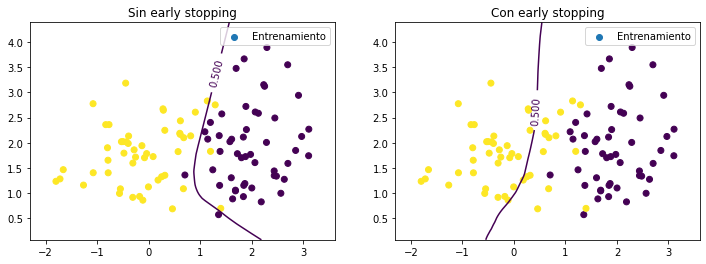

In [8]:
X,y=datasets[2]
test_size = 1/3;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
#Valores mínimos y máximos de las variables
xmin = np.min(X,axis=0)
xmax = np.max(X,axis=0)
#Malla de valores
x1, x2 = np.meshgrid(np.linspace(xmin[0]-0.5, xmax[0]+0.5, 100),
                     np.linspace(xmin[1]-0.5, xmax[1]+0.5, 100))
#Datos para evaluar los clasificadores y graficar la frontera:
X_plot = np.hstack((x1.reshape(-1,1),x2.reshape(-1,1)))

#Espacio para crear, entrenar, y evaluar los MLPs:
test_size = 1/3;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

mlpc = MLPClassifier(hidden_layer_sizes=(100,50, 20), random_state=1997, early_stopping=False)
    
mlpc.fit(X_train, y_train)

pred_mlpc=mlpc.predict_proba(X_plot)

#


plt.figure(figsize=(12,4))
#Espacio para graficar la frontera sin early stopping
plt.subplot(1,2,1)
plt.title('Sin early stopping')

# [.5] para que muestre solo la frontera de decision
cnt=plt.contour(x1,x2,pred_mlpc[:,1].reshape(x1.shape), [.5])
plt.clabel(cnt, inline=1, fontsize=10)


plt.scatter(X[:,0],X[:,1],c=y,label='Entrenamiento')
plt.legend()



#Espacio para graficar la frontera con early stopping
mlpc = MLPClassifier(hidden_layer_sizes=(100,50, 20), random_state=1997, early_stopping=True)
    
mlpc.fit(X_train, y_train)

pred_mlpc=mlpc.predict_proba(X_plot)

plt.subplot(1,2,2)
plt.title('Con early stopping')

# [.5] para que muestre solo la frontera de decision
cnt=plt.contour(x1,x2,pred_mlpc[:,1].reshape(x1.shape), [.5])
plt.clabel(cnt, inline=1, fontsize=10)

plt.scatter(X[:,0],X[:,1],c=y,label='Entrenamiento')
plt.legend()

plt.show()

Al hacer early stopping realizará un menor sobre ajuste a menor costo casi como si fuera un LDA

¿Qué diferencias nota en las fronteras?

¿A qué se deben las diferencias?

¿Cuál de los dos MLP es mejor? Justifique su respuesta.

# Actividad 7:#

Para esta actividad trabajaran con la base de datos, preprocesada de ```20 news groups ``` la cual tiene alrededor de 130 000, la cual es una base de datos para clasificar noticias. Esta actividad es más un **challenge**, la idea es que entrenen una red neuronal artificial MLP, con algun esquema de validación cruzada, con los datos adjuntos al laboratorio. Deben explorar varias arquitecturas y dejar, en este notebook, la mejor red entrenada; con el fin de evaluarla por parte nuestra. Nosotros la evaluaremos en unos datos que fueron pasados a ustedes, y ganara la red neuronal con mayor rendimiento, este sera medido con varias medidas de desempeño. 

# ¿Cómo guardar un modelo de sklearn?
Es fácil, les dejo un ejemplo en la siguente celda de código



In [1]:
print("It's runn")
import random
import numpy as np
import joblib
#joblib.dump(mlpc, 'modelo_MLP.sav') # mlp: es la clase con el modelo entrenado, por ustedes. 
#model_sklearn= joblib.load('modelo_MLP.sav') # con esta linea se carga el modelo, la clase, en la variable model_sklearn.

# More about "scores"
#https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics
#https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report


from scipy.io import loadmat

data=loadmat("Carlos Arturo Moreno Tabares - 20newsgroup.mat")

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold

# Get X data
X=data["X"]

# Get y data
y=data["y"][0]

# Show shapes
print(X.shape)


print(y.shape)
print(y)
#print(y.max)
#print(y.min)

# print all "labels"
print("all unique values for y 'Labels'\n{}".format(np.unique(y)))




#Espacio para crear, entrenar, evaluar los clasificadores y graficar fronteras:
test_size = 1/3;
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

"""
early_stopping=False
activation='relu'
score_train_max=0
score_test_max=0
for size_layer in range(1, 30):
    for i in range(20):
        random_state=random.randint(1, 10000)
        hidden_layer_sizes=[]
        
        # Get hidden_layers
        hidden_layer_quantity=size_layer

        for hidden_i in range(hidden_layer_quantity):
            hidden_layer_sizes.append(random.randint(10, 1100))

        hidden_layer_sizes=tuple(hidden_layer_sizes)


        mlpc = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=random_state, early_stopping=early_stopping, activation=activation)
        mlpc.fit(X_train, y_train)

        score_train=mlpc.score(X_train, y_train)
        
        score_test=mlpc.score(X_test, y_test)

        # Check max accuracy
        if(score_train>score_train_max):
            print("-"*50)
            print("Score train")
            print("accuracy {:.2f}% With".format(score_train*100))
            print("hidden_layer_sizes: \n{}".format(hidden_layer_sizes))
            print("random_state: \n{}".format(random_state))
            print("early_stopping: \n{}".format(early_stopping))
            print("activation: \n{}".format(activation))
            score_train_max=score_train
            print("-"*50)
            #joblib.dump(mlpc, 'modelo_MLP.sav') # mlp: es la clase con el modelo entrenado, por ustedes. 
            
        if(score_test>score_test_max):
            print("-"*50)
            print("Score test")
            print("accuracy {:.2f}% With".format(score_test*100))
            print("hidden_layer_sizes: \n{}".format(hidden_layer_sizes))
            print("random_state: \n{}".format(random_state))
            print("early_stopping: \n{}".format(early_stopping))
            print("activation: \n{}".format(activation))
            score_test_max=score_test
            print("-"*50)
        
        # Delete vars
        del random_state
        del mlpc
        del hidden_layer_sizes
        del hidden_layer_quantity
"""
# Single Test
hidden_layer_sizes=(287,)
random_state=6287
early_stopping=False
activation="relu"
mlpc = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes, random_state=random_state, early_stopping=early_stopping, activation=activation)
mlpc.fit(X_train, y_train)
score_train=mlpc.score(X_train, y_train)
score_test=mlpc.score(X_test, y_test)

joblib.dump(mlpc, 'modelo_MLP.sav') # mlp: es la clase con el modelo entrenado, por ustedes. 

print("-"*50)
print("Score train")
print("accuracy {:.2f}% With".format(score_train*100))
print("hidden_layer_sizes: \n{}".format(hidden_layer_sizes))
print("random_state: \n{}".format(random_state))
print("early_stopping: \n{}".format(early_stopping))
print("activation: \n{}".format(activation))
print("-"*50)

print("-"*50)
print("Score test")
print("accuracy {:.2f}% With".format(score_test*100))
print("hidden_layer_sizes: \n{}".format(hidden_layer_sizes))
print("random_state: \n{}".format(random_state))
print("early_stopping: \n{}".format(early_stopping))
print("activation: \n{}".format(activation))
print("-"*50)

It's runn
(7910, 1000)
(7910,)
[ 7  0 12 ... 13  5 14]
all unique values for y 'Labels'
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
--------------------------------------------------
Score train
accuracy 100.00% With
hidden_layer_sizes: 
(287,)
random_state: 
6287
early_stopping: 
False
activation: 
relu
--------------------------------------------------
--------------------------------------------------
Score test
accuracy 83.77% With
hidden_layer_sizes: 
(287,)
random_state: 
6287
early_stopping: 
False
activation: 
relu
--------------------------------------------------
